<a href="https://colab.research.google.com/github/Aniket-Satpute/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_aniket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

# **INTRODUCTION-**

### Credit risk has traditionally been the greatest risk among all the risks that the banking and credit card industry are facing, and it is usually the one requiring the most capital

### Despite machine learning and big data have been adopted by the banking industry, the current applications used by the banks are mainly focused on credit score predicting. The disadvantage of heavily relying on credit score is banks would miss valuable customers who come from countries that are traditionally underbanked with no credit history or new immigrants who have repaying power but lack credit history. 

### Due to the scope of the project and lack of computational resources, this analysis is not intended to be exhaustive, we only applied 3 classification machine learning models

# **SCOPE OF THE PROJECT-**

### The purpose of this project is to conduct quantitative analysis on credit card default risk by
### applying 3 classification machine learning models.
### machine learning application on default risk itself and the predictor features do not include
### credit score or credit history. Due to the regulatory constraints that banks are facing, for
### example, The Fair Credit Reporting Act (FCRA), the algorithms used in this analysis are
### relatively simple and interpretable.


# <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Data Prepping<br>

###**Mount A Drive-**

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Importing the libraries** 

In [31]:
#Importing libraries for Exploratory data Analysis
import numpy as np # For some math operations on arrays in predictions.
import pandas as pd # To upload the large data set and wrangling the data.
import seaborn as sns  # Used for visualization of dataset.
import matplotlib.pyplot as plt # Used for visualization of dataset.
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.formula.api import glm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [32]:
sns.set()
pd.options.display.max_columns = None

installing some upgrade to read xls file.

In [33]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
# Loading Data set of xls file
cc_df = pd.read_excel(r'/content/drive/MyDrive/Credit Card Default Prediction github/default of credit card clients.xls',header=1)

## **Last five values of given dataset**

In [35]:
cc_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


lets do some correction for further processing

In [36]:
# Simplifying column names and bringing consistency
cc_df.rename(
    columns={"PAY_0": "PAY_1", "default payment next month": "DEFAULT"}, inplace=True
)
cc_df.columns = [name.lower() for name in list(cc_df.columns)]

**Comment:-**
here I replace the PAY_0 with PAY_1 and default payment next month with DEFAULT as it will create the ease for further analysis

further i have also convert the upper case column names in smaller case as it will be quite heptic to use upper case all the time
as python is case sensitive 

# **Understanding The data**

In [37]:
# To understand some statistics of our dataset-
cc_df.describe()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [38]:
cc_df.shape

(30000, 25)

**Comment:-**
There are Total 30000 observations in the dataset

containing 25 columns

# **Checking the unique values for Analyzing the Dataset for further analysis.**

In [39]:
# To check the uniqueness of variables -
cc_df.nunique()

id           30000
limit_bal       81
sex              2
education        7
marriage         4
age             56
pay_1           11
pay_2           11
pay_3           11
pay_4           11
pay_5           10
pay_6           10
bill_amt1    22723
bill_amt2    22346
bill_amt3    22026
bill_amt4    21548
bill_amt5    21010
bill_amt6    20604
pay_amt1      7943
pay_amt2      7899
pay_amt3      7518
pay_amt4      6937
pay_amt5      6897
pay_amt6      6939
default          2
dtype: int64

**Comment:-**
There are no missing values in the dataset. That is usually good news but it's possible that some data might be corrupted; we'll check for that later.

In [40]:
# Checking the entries of the ID column
print(cc_df["id"].value_counts())
cc_df.drop(["id"], axis=1, inplace=True)

1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: id, Length: 30000, dtype: int64


# **Exploratory Data Analysis**

Even though the data description said that the minimum value of `pay_i`'s was -1, all of them have a minimum value of -2. Also `marriage` has a minimum value of 0 but the description said the minimum value is 1. And `education` has a maximum value of 6 while it was supposed to have a maximum value of 4. I'll take a closer look later.

I notice that some of the `bill_amti`'s are negative. Although surprising, it is not uncommon to have a negative balance because of merchant refunds or overpayments. The values are a bit on the higher side and I'll take another look later.

Text(0.5, 1.0, 'Distribution of defaulters vs non-defaulters')

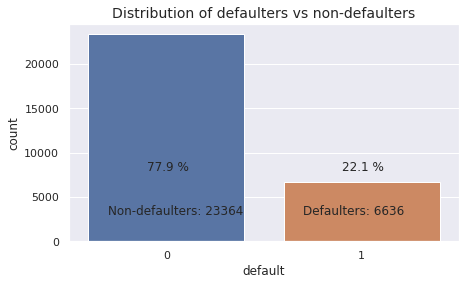

In [41]:
# The frequency of defaults
defs = cc_df["default"].sum()
non_defs = len(cc_df) - defs

# Percentage
def_perc = round(defs / len(cc_df) * 100, 1)
non_def_perc = round(non_defs / len(cc_df) * 100, 1)

# import sys
plt.figure(figsize=(7, 4))
sns.countplot("default", data=cc_df)
plt.annotate(
    "Non-defaulters: {}".format(non_defs),
    xy=(-0.3, 15000),
    xytext=(-0.3, 3000),
    size=12,
)
plt.annotate(
    "Defaulters: {}".format(defs), xy=(0.7, 15000), xytext=(0.7, 3000), size=12
)
plt.annotate(str(non_def_perc) + " %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(def_perc) + " %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title("Distribution of defaulters vs non-defaulters", size=14)

## The relationship Between the Variables and Default<br>

I will study the relationship between the features and credit card default. Although this is not definitive, it will give me a good understanding of the data. This will also help me make decisions about some of the features having values different than what was provided in the data description.

In [42]:
def compare_default_across_features(df, col_name, dict_label={}):
    """
    This function quantifies and displays the distribution of default across the various classes of a feature.
    
    INPUT:
    - df - (pd.DataFrame) the dataframe
    - col_name - (str) the column name of the feature being considered
    - dict_label - (dictionary) a dictionary relating the values of the column to what they represent
    
    OUTPUT:
    - Displays a bar plot showing the population distribution by feature values
    - Displays and returns a cross-tab showing the rate of default across each feature value
    - Displays a bar plot showing the population distribution and default by the feature values 
    """

    # Create a cross-tab and rename indices for readability
    cross_tab = pd.crosstab(df["default"], df[col_name], margins=True, normalize=False)

    new_index = {0: "Non-default proportion", 1: "Default proportion"}
    new_columns = dict_label

    cross_tab.rename(index=new_index, columns=new_columns, inplace=True)

    # Plot a bar graph showing population distribution by the feature values
    plt.figure(figsize=(10, 5))
    i = cross_tab.shape[1] - 1
    cross_tab.loc["All"][0:i].plot.bar(rot=30, fontsize=14)
    plt.title("Population Distribution by " + col_name, fontsize=20)
    plt.ylabel("count")
    plt.show()

    # Normalise the cross-tab and print it
    cross_tab_norm = cross_tab / cross_tab.loc["All"]
    display(cross_tab_norm)

    # Plot a bar graph showing population distribution by the feature values separating the defaulters and non-defaulters
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=col_name, hue="default", data=df)
    plt.title("Population Distribution by " + col_name + " with default and non-default",fontsize=20,)

    # Return the normalised cross-tab
    return cross_tab_norm

### **Is default proportion affected by education?**

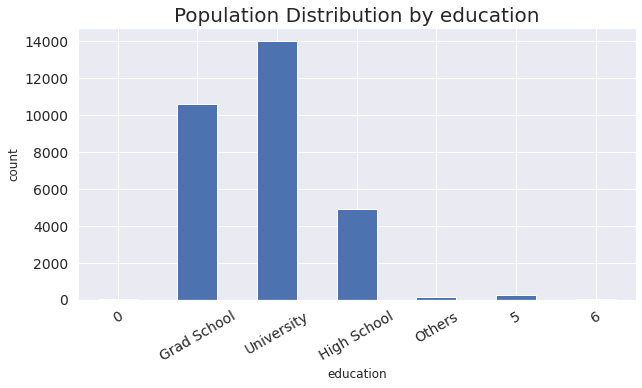

education,0,Grad School,University,High School,Others,5,6,All
default,,,,,,,,
Non-default proportion,1.0,0.807652,0.762651,0.748424,0.943089,0.935714,0.843137,0.7788
Default proportion,0.0,0.192348,0.237349,0.251576,0.056911,0.064286,0.156863,0.2212
All,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


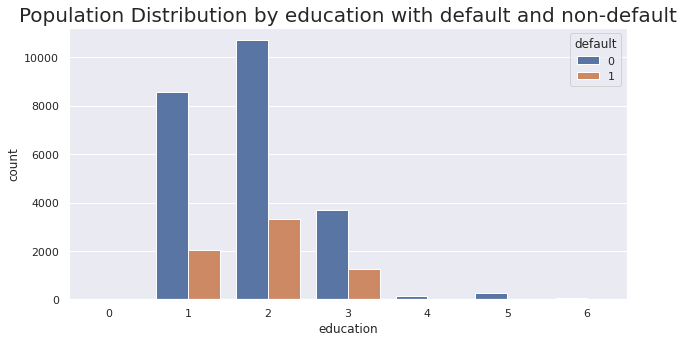

In [43]:
_ = compare_default_across_features(
    cc_df,
    "education",
    {
        0: "0",
        1: "Grad School",
        2: "University",
        3: "High School",
        4: "Others",
        5: "5",
        6: "6",
    },
)

**Comments**
* A quick glance shows that the default proportion decreases with higher education level. This would agree with my intuition because more educated people tend to have higher paying jobs which might make it easier for them to pay back their debts.

* As I mentioned earlier, I notice that there are education categories with values 0, 5 and 6 which are not explained by the data description.
* I could either drop those data points, keep them  or merge them with another cluster. Since there is an `Others` category, I will cluster them with that category. (This is done a bit later.)

### **Is the proportion of defaults correlated with age?**

Since age is a discrete variable, I have to figure out a way to bin the values. There are several ways to do this (including using the frequency and quantiles) but I will choose a simpler and more intuitive way by rounding their age to the lowest multiple of 10.

In [44]:
# Creating the age bins
cc_df['age_group'] = cc_df['age']//10
age_group_names = [str(i) + '0s' for i in range(2,8)]
age_dict = dict(zip(range(2,8), age_group_names))
#cc_df['age_bin'] = pd.cut(X['age'], 6, labels=age_group_names)

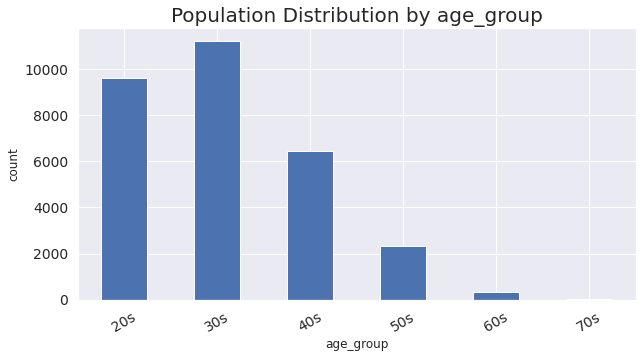

age_group,20s,30s,40s,50s,60s,70s,All
default,,,,,,,
Non-default proportion,0.771574,0.797473,0.770266,0.751388,0.716561,0.72,0.7788
Default proportion,0.228426,0.202527,0.229734,0.248612,0.283439,0.28,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0000


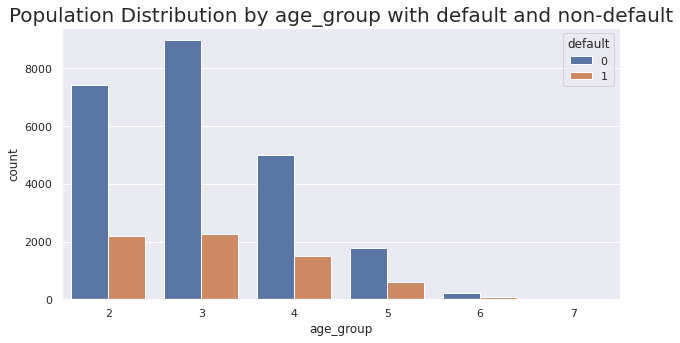

In [45]:
age_cross_tab = compare_default_across_features(cc_df, 'age_group', age_dict)

### **Is the default proportion affected by credit limit?**

Instead of binning the credit limits, I try to see if I can analyse any trends from a density plot.

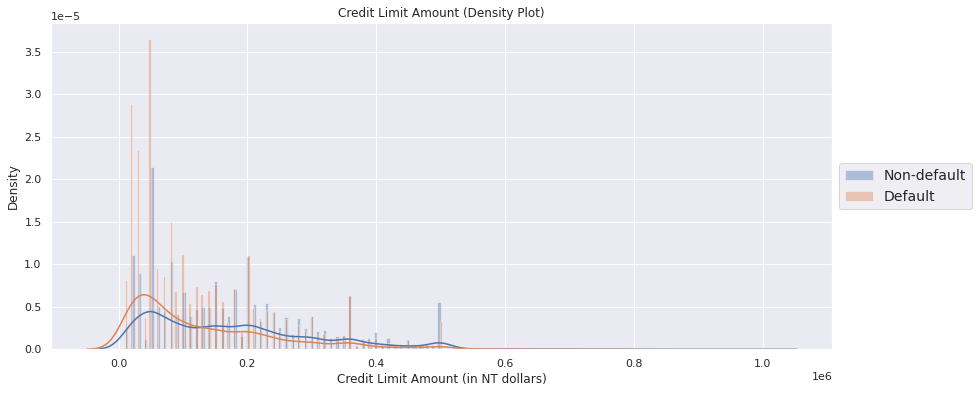

In [46]:
cc_def0 = cc_df.loc[cc_df['default'] == 0]["limit_bal"]
cc_def1 = cc_df.loc[cc_df['default'] == 1]["limit_bal"]
plt.figure(figsize = (14,6))
sns.distplot(cc_def0,kde=True,bins=200, label='Non-default')
sns.distplot(cc_def1,kde=True,bins=200, label="Default")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)
plt.title('Credit Limit Amount (Density Plot)')
plt.xlabel('Credit Limit Amount (in NT dollars)')
plt.show()

**Comment**

* Looking at the density plot, it seems that people with higher credit limit have significantly lower default proportion.
* Again, intuitively that is not surprising because the people who have higher credit limits must have displayed long periods of fiscal responsibility to reach that place.